In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

# Import your helper function
sys.path.append('.')
from helper import load_datasets

# Load one dataset first to explore
ds = xr.open_dataset("../data/003_2006_2080_352_360.nc")
print(ds)

<xarray.Dataset> Size: 65MB
Dimensions:     (time: 27374, lat: 11, lon: 6)
Coordinates:
  * lat         (lat) float32 44B 49.48 50.42 51.36 52.3 ... 57.02 57.96 58.9
  * lon         (lon) float32 24B 352.5 353.8 355.0 356.2 357.5 358.8
  * time        (time) object 219kB 2006-01-02 00:00:00 ... 2080-12-31 00:00:00
Data variables:
    TREFMXAV_U  (time, lat, lon) float32 7MB ...
    FLNS        (time, lat, lon) float32 7MB ...
    FSNS        (time, lat, lon) float32 7MB ...
    PRECT       (time, lat, lon) float32 7MB ...
    PRSN        (time, lat, lon) float32 7MB ...
    QBOT        (time, lat, lon) float32 7MB ...
    TREFHT      (time, lat, lon) float32 7MB ...
    UBOT        (time, lat, lon) float32 7MB ...
    VBOT        (time, lat, lon) float32 7MB ...


In [2]:
# Examination of the dimensions
print("\nDimensions:")
for dim_name, dim in ds.dims.items():
    print(f"  {dim_name}: {dim}")

# Checking coordinate values
print("\nLatitude range:", ds.lat.values.min(), "to", ds.lat.values.max())
print("Longitude range:", ds.lon.values.min(), "to", ds.lon.values.max())
print("Time period:", ds.time.values[0], "to", ds.time.values[-1])


Dimensions:
  time: 27374
  lat: 11
  lon: 6

Latitude range: 49.47644 to 58.900524
Longitude range: 352.5 to 358.75
Time period: 2006-01-02 00:00:00 to 2080-12-31 00:00:00


C:\Users\rebec\AppData\Local\Temp\ipykernel_30644\1257791086.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for dim_name, dim in ds.dims.items():


In [3]:
# Examine variables
print("\nVariables:")
for var_name in ds.data_vars:
    print(f"  {var_name}: {ds[var_name].dims}, shape: {ds[var_name].shape}")
    if hasattr(ds[var_name], 'units'):
        print(f"    Units: {ds[var_name].units}")
    if hasattr(ds[var_name], 'long_name'):
        print(f"    Long name: {ds[var_name].long_name}")
    print()


Variables:
  TREFMXAV_U: ('time', 'lat', 'lon'), shape: (27374, 11, 6)
    Units: K
    Long name: Urban daily maximum of average 2-m temperature

  FLNS: ('time', 'lat', 'lon'), shape: (27374, 11, 6)
    Units: W/m2
    Long name: Net longwave flux at surface

  FSNS: ('time', 'lat', 'lon'), shape: (27374, 11, 6)
    Units: W/m2
    Long name: Net solar flux at surface

  PRECT: ('time', 'lat', 'lon'), shape: (27374, 11, 6)
    Units: m/s
    Long name: Total (convective and large-scale) precipitation rate (liq + ice)

  PRSN: ('time', 'lat', 'lon'), shape: (27374, 11, 6)

  QBOT: ('time', 'lat', 'lon'), shape: (27374, 11, 6)
    Units: kg/kg
    Long name: Lowest model level water vapor mixing ratio

  TREFHT: ('time', 'lat', 'lon'), shape: (27374, 11, 6)
    Units: K
    Long name: Reference height temperature

  UBOT: ('time', 'lat', 'lon'), shape: (27374, 11, 6)
    Units: m/s
    Long name: Lowest model level zonal wind

  VBOT: ('time', 'lat', 'lon'), shape: (27374, 11, 6)
    

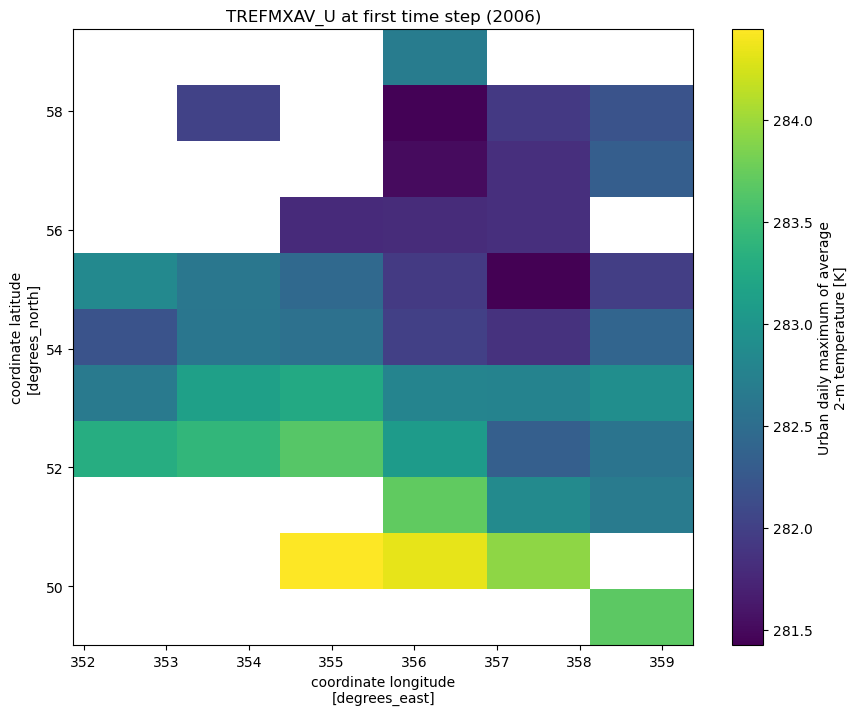

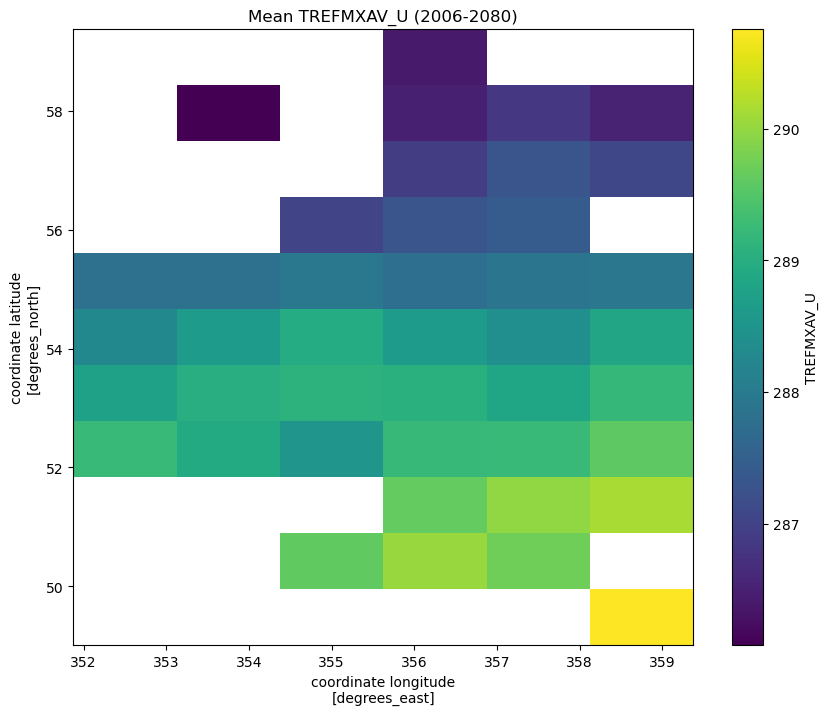

In [4]:
# Plot temperature for a single time step
plt.figure(figsize=(10, 8))
ds.TREFMXAV_U.isel(time=0).plot(cmap='viridis')
plt.title('TREFMXAV_U at first time step (2006)')
plt.show()

# Plot temporal mean
temp_mean = ds.TREFMXAV_U.mean(dim='time')
plt.figure(figsize=(10, 8))
temp_mean.plot(cmap='viridis')
plt.title('Mean TREFMXAV_U (2006-2080)')
plt.show()

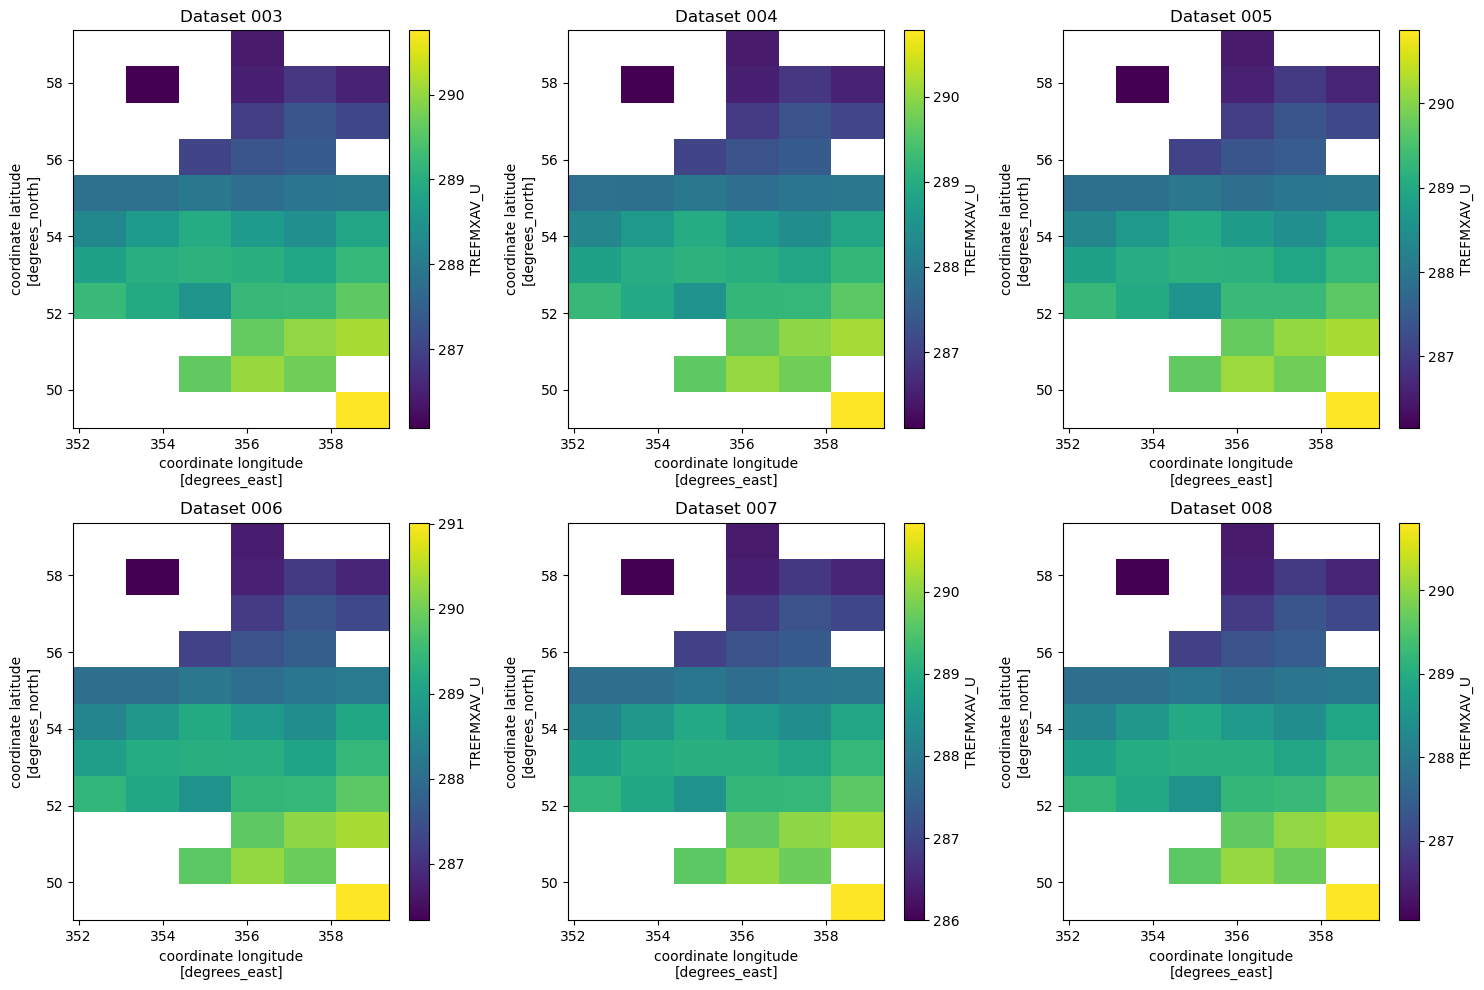

In [5]:
# Define paths to all datasets
file_paths = [
    "../data/003_2006_2080_352_360.nc",
    "../data/004_2006_2080_352_360.nc",
    "../data/005_2006_2080_352_360.nc",
    "../data/006_2006_2080_352_360.nc",
    "../data/007_2006_2080_352_360.nc",
    "../data/008_2006_2080_352_360.nc"
]

# Load all datasets
all_datasets = load_datasets(file_paths)

# Compare mean temperature across all datasets
plt.figure(figsize=(15, 10))
for i, dataset in enumerate(all_datasets):
    temp = dataset.TREFMXAV_U.mean(dim='time')
    plt.subplot(2, 3, i+1)
    temp.plot(cmap='viridis')
    plt.title(f'Dataset {i+3:03d}')
plt.tight_layout()
plt.show()

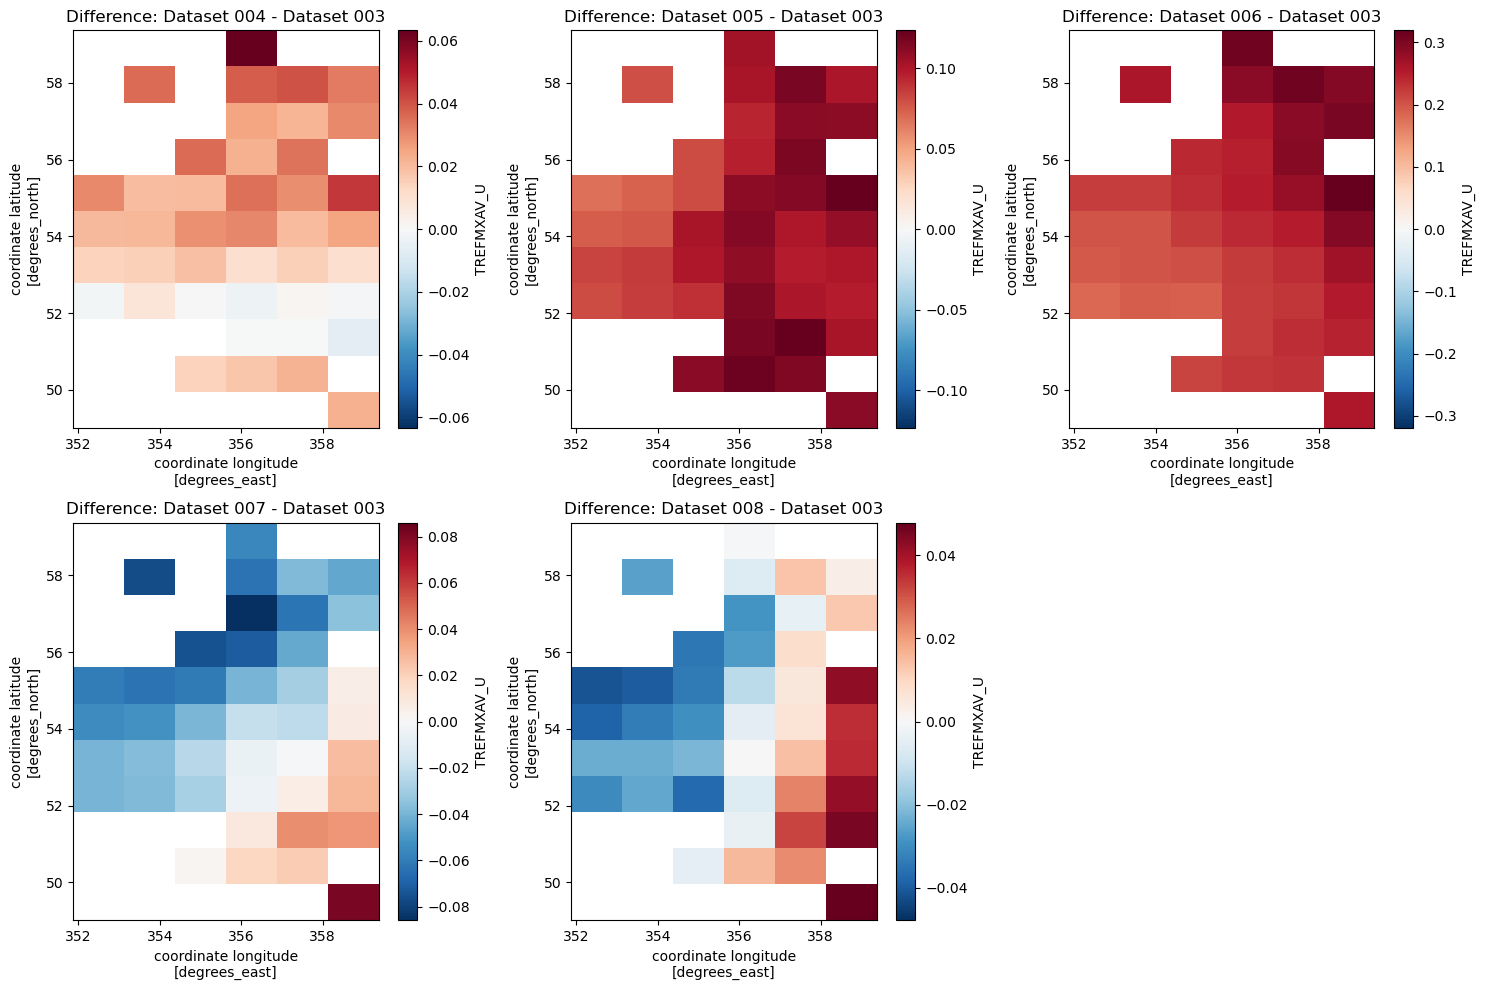

In [6]:
# Calculate difference between each dataset and the first one
plt.figure(figsize=(15, 10))
base_temp = all_datasets[0].TREFMXAV_U.mean(dim='time')

for i in range(1, len(all_datasets)):
    temp = all_datasets[i].TREFMXAV_U.mean(dim='time')
    diff = temp - base_temp
    plt.subplot(2, 3, i)
    diff.plot(cmap='RdBu_r', center=0)
    plt.title(f'Difference: Dataset {i+3:03d} - Dataset 003')
plt.tight_layout()
plt.show()

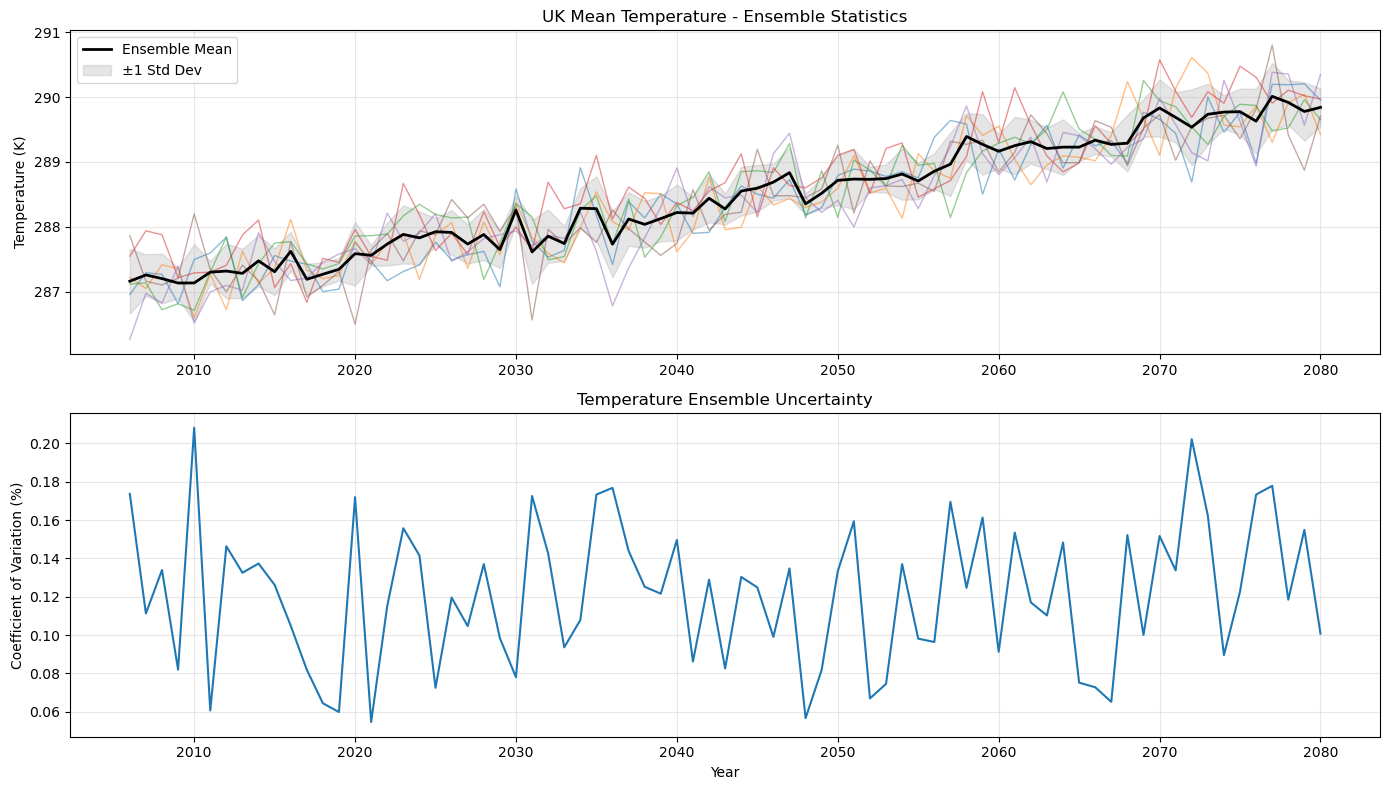

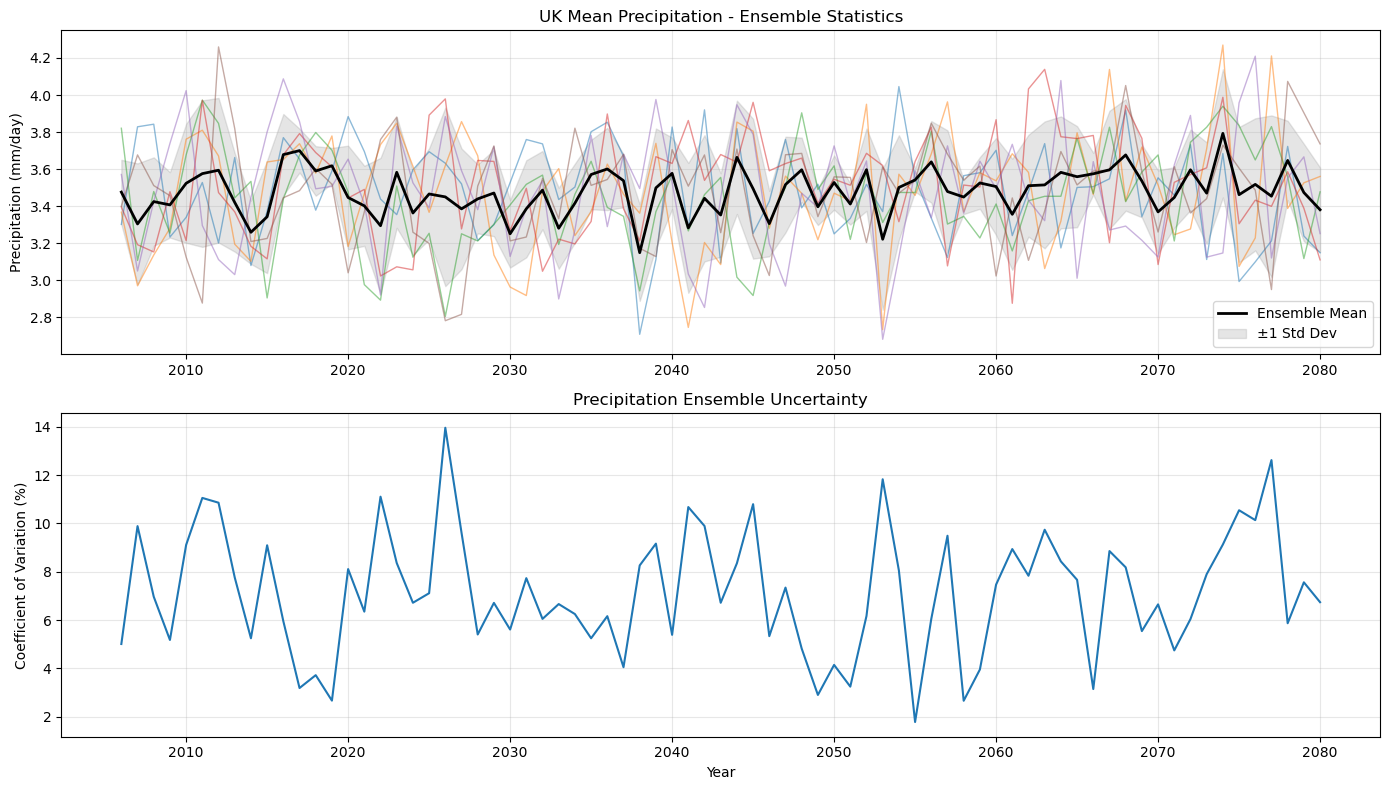

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)

# 1. Calculate temperature ensemble statistics over time
temp_time_series = []

for i, ds in enumerate(datasets):
    # Calculate UK mean temperature over time
    uk_temp = ds.TREFMXAV_U.mean(dim=['lat', 'lon'])
    
    # Group by year
    annual_temp = uk_temp.groupby('time.year').mean()
    
    # Store in list
    temp_time_series.append(annual_temp)

# Convert to DataFrame for easier analysis
temp_df = pd.DataFrame({f'Dataset {i+3:03d}': series.values 
                      for i, series in enumerate(temp_time_series)},
                     index=temp_time_series[0].year.values)

# Calculate ensemble statistics
temp_df['Ensemble Mean'] = temp_df.mean(axis=1)
temp_df['Ensemble Std'] = temp_df.std(axis=1)
temp_df['Coefficient of Variation (%)'] = (temp_df['Ensemble Std'] / temp_df['Ensemble Mean']) * 100

# Plot ensemble statistics over time
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
for col in temp_df.columns[:6]:  # Original datasets
    plt.plot(temp_df.index, temp_df[col], alpha=0.5, linewidth=1)
plt.plot(temp_df.index, temp_df['Ensemble Mean'], 'k-', linewidth=2, label='Ensemble Mean')
plt.fill_between(temp_df.index, 
                temp_df['Ensemble Mean'] - temp_df['Ensemble Std'],
                temp_df['Ensemble Mean'] + temp_df['Ensemble Std'],
                alpha=0.2, color='gray', label='±1 Std Dev')
plt.title('UK Mean Temperature - Ensemble Statistics')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(temp_df.index, temp_df['Coefficient of Variation (%)'])
plt.title('Temperature Ensemble Uncertainty')
plt.xlabel('Year')
plt.ylabel('Coefficient of Variation (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Calculate precipitation ensemble statistics over time
precip_time_series = []
conversion_factor = 86400 * 1000  # Convert from m/s to mm/day

for i, ds in enumerate(datasets):
    # Calculate UK mean precipitation over time
    uk_precip = ds.PRECT.mean(dim=['lat', 'lon']) * conversion_factor
    
    # Group by year
    annual_precip = uk_precip.groupby('time.year').mean()
    
    # Store in list
    precip_time_series.append(annual_precip)

# Convert to DataFrame
precip_df = pd.DataFrame({f'Dataset {i+3:03d}': series.values 
                        for i, series in enumerate(precip_time_series)},
                       index=precip_time_series[0].year.values)

# Calculate ensemble statistics
precip_df['Ensemble Mean'] = precip_df.mean(axis=1)
precip_df['Ensemble Std'] = precip_df.std(axis=1)
precip_df['Coefficient of Variation (%)'] = (precip_df['Ensemble Std'] / precip_df['Ensemble Mean']) * 100

# Plot ensemble statistics over time
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
for col in precip_df.columns[:6]:  # Original datasets
    plt.plot(precip_df.index, precip_df[col], alpha=0.5, linewidth=1)
plt.plot(precip_df.index, precip_df['Ensemble Mean'], 'k-', linewidth=2, label='Ensemble Mean')
plt.fill_between(precip_df.index, 
                precip_df['Ensemble Mean'] - precip_df['Ensemble Std'],
                precip_df['Ensemble Mean'] + precip_df['Ensemble Std'],
                alpha=0.2, color='gray', label='±1 Std Dev')
plt.title('UK Mean Precipitation - Ensemble Statistics')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(precip_df.index, precip_df['Coefficient of Variation (%)'])
plt.title('Precipitation Ensemble Uncertainty')
plt.xlabel('Year')
plt.ylabel('Coefficient of Variation (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()